# **ML Decision Tree Classification With The Penguins Dataset**

Student: Dan Koskiranta

Student Number: G00397054

Date: 24 November 2023

Description: A Decision Tree Machine Learning Classifier Model for the Penguins data set

# Penguins Data Set Analysis

## Load the Penguins Data Set

Load the Penguins data set. [1] https://github.com/allisonhorst/palmerpenguins/tree/main/inst/extdata


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv

In [ ]:
print(cv.__version__)

4.8.0


The picture below was generated using the following resource [8] https://deepai.org/machine-learning-model/text2img

The following prompt was used to generate the image: "Penguins dataset for Adelie, Gentoo and Chinstrap."

Note: Since the picture is AI generated, it is not 100 % accurate.

In [ ]:
img = cv.imread('/content/drive/MyDrive/Images/72553574-c2b4-4920-912b-6e3f8632e378.jpg')

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
img_smaller = cv.resize(img, (512,512))

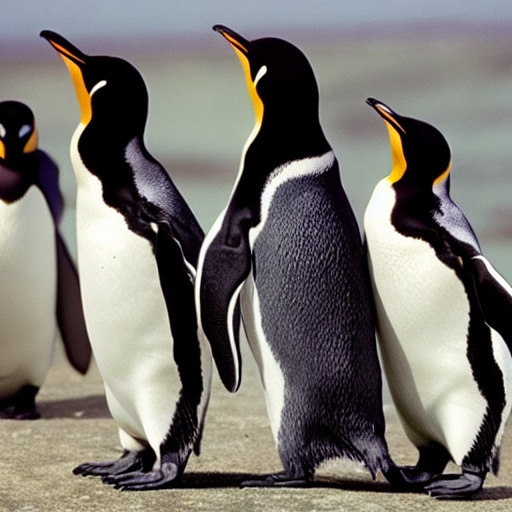

In [ ]:
cv2_imshow(img_smaller)

Import pandas and numpy libraries

In [ ]:
import pandas as pd
import numpy as np


Read the dataset from the csv file.
df is the Pandas dataframe containing the dataset.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Decision Trees/penguins.csv')



In [ ]:
#df.head()
df.sample(5)  #Select a random sample of 5 rows from the dataset.


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
54,Adelie,Biscoe,34.5,18.1,187.0,2900.0,female,2008
217,Gentoo,Biscoe,49.8,16.8,230.0,5700.0,male,2008
200,Gentoo,Biscoe,44.9,13.3,213.0,5100.0,female,2008
318,Chinstrap,Dream,50.9,19.1,196.0,3550.0,male,2008
22,Adelie,Biscoe,35.9,19.2,189.0,3800.0,female,2007


Penguin Species: Adelie, Gentoo, and Chinstrap

## Shape of the Dataset

Find out the shape of the dataset, i.e. how many rows and columns.

In [ ]:
print(df.shape)

(344, 8)


Print a summary of infromation about a Pandas Dataframe.

In [ ]:
df.info

<bound method DataFrame.info of        species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g   

Print out the dataset description

In [ ]:
#Add code
df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,344,344,342.000000,342.000000,342.000000,342.000000,333,344.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,152,168,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN,2008.029070
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN,0.818356
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN,2009.000000


Number of species

In [ ]:
df['species'].value_counts()  #Extract the column labelled 'species' and count the occurences of each unique value

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

Adelie appears 152 times, Gentoo 124 times and Chinstrop 68 times in the 'species' column.

#Data Exploration and Visualization

We will use both Matplotlib and Seaborn libraries for plotting & visualizing data.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Check if data is missing.

In [ ]:
df.isnull().sum() # Show the count of missing values for each column in the dataframe.

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [ ]:
df = df.dropna()  #Drop rows with missing values

In [ ]:
df.isnull().sum() #Check the data again

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

Import train_test_split function from scikit-learn. Split the dataset into training and testing sets to evaluate the model's performance.
40 % will be used for testing and 60 % for training.

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.4, stratify=df['island'], random_state=42)

Print a summary of the new train & test dataframes.

In [ ]:
train

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
71,Adelie,Torgersen,39.7,18.4,190.0,3900.0,male,2008
224,Gentoo,Biscoe,48.2,15.6,221.0,5100.0,male,2008
202,Gentoo,Biscoe,46.6,14.2,210.0,4850.0,female,2008
169,Gentoo,Biscoe,49.2,15.2,221.0,6300.0,male,2007
322,Chinstrap,Dream,50.1,17.9,190.0,3400.0,female,2009
...,...,...,...,...,...,...,...,...
236,Gentoo,Biscoe,44.9,13.8,212.0,4750.0,female,2009
83,Adelie,Torgersen,35.1,19.4,193.0,4200.0,male,2008
22,Adelie,Biscoe,35.9,19.2,189.0,3800.0,female,2007
163,Gentoo,Biscoe,49.0,16.1,216.0,5550.0,male,2007


In [ ]:
test

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
324,Chinstrap,Dream,51.5,18.7,187.0,3250.0,male,2009
49,Adelie,Dream,42.3,21.2,191.0,4150.0,male,2007
57,Adelie,Biscoe,40.6,18.8,193.0,3800.0,male,2008
61,Adelie,Biscoe,41.3,21.1,195.0,4400.0,male,2008
120,Adelie,Torgersen,36.2,17.2,187.0,3150.0,female,2009
...,...,...,...,...,...,...,...,...
117,Adelie,Torgersen,37.3,20.5,199.0,3775.0,male,2009
31,Adelie,Dream,37.2,18.1,178.0,3900.0,male,2007
92,Adelie,Dream,34.0,17.1,185.0,3400.0,female,2008
183,Gentoo,Biscoe,42.8,14.2,209.0,4700.0,female,2007


#Histograms of Features

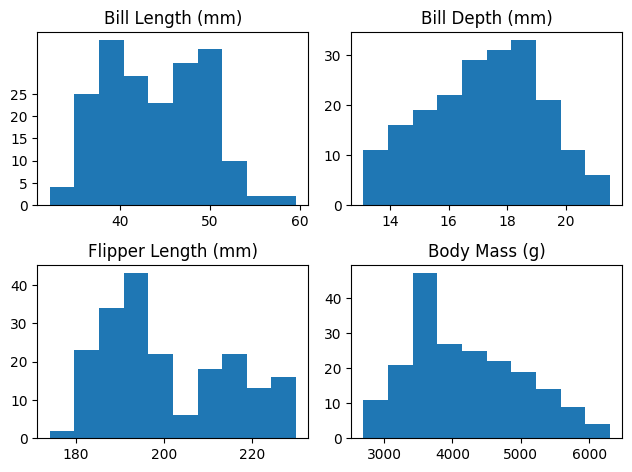

In [ ]:
fig, ax = plt.subplots(2,2)                           #Create 2 x 2 grid of subplots. ax is an array of axes objects representing each subplot. fig represents the entire figure.
n_bins = 10                                           #set the number of bins for the histograms to 10
ax[0,0].hist(train['bill_length_mm'], n_bins);        #plot histogram for bill length. [0,0] = display bill_length subplot top left.
ax[0,0].set_title('Bill Length (mm)');
ax[0,0].set_yticks([0, 5, 10, 15, 20, 25])

ax[0,1].hist(train['bill_depth_mm'], n_bins);
ax[0,1].set_title('Bill Depth (mm)');

ax[1,0].hist(train['flipper_length_mm'], n_bins);     #[1,0] = bottom left
ax[1,0].set_title('Flipper Length (mm)');

ax[1,1].hist(train['body_mass_g'], n_bins);
ax[1,1].set_title('Body Mass (g)');
fig.tight_layout(pad=1.0)                             #Adjust the layout of subplots for better spacing. 'pad' controls padding between subplots

Print the different number of samples for each species.

<Axes: ylabel='species'>

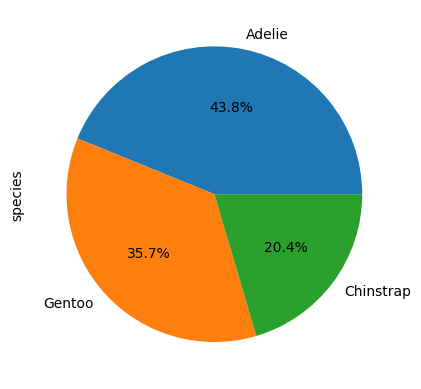

In [ ]:
df['species'].value_counts().plot(kind='pie', autopct='%1.1f%%') #value_counts function counts occurences of each unique value in the species column.
                                                                 #%1.1f%% displays percentage of each slice with one decimal place. Display as a pie chart

##Box Plots of features

Box plots are another type of plot to visualize the feature characteristics.

We will use the Seaborn boxplot function, again for each of the four features.

x='species' means that species column is used for x-axis. data=train argument tells Seaborn to use 'train' as the source of data when creating the boxplot. The 'species' and 'length_mm' from the dataframe are used to create the specified boxplot. 'palette=colorblind' sets the colours for the boxplot.

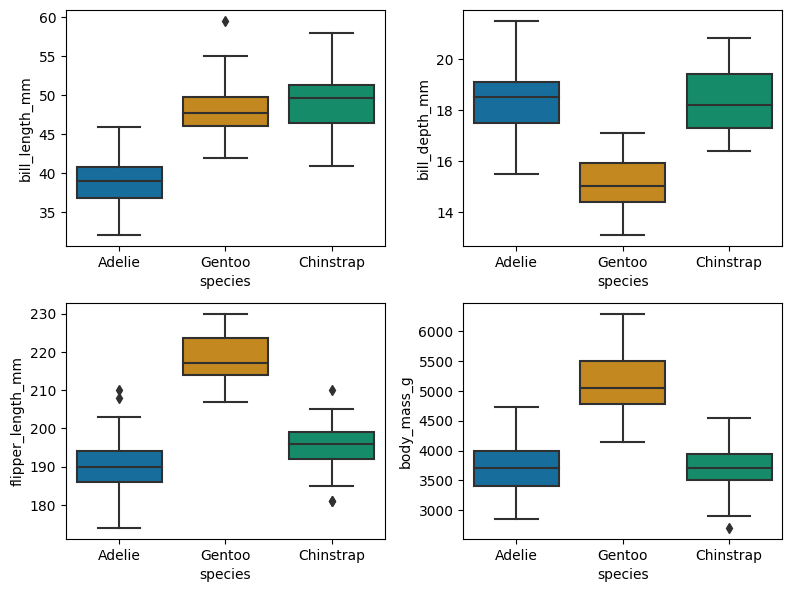

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(8,6)) #width = 8 inches, height = 6 inches for figure
sns.boxplot(x='species', y= 'bill_length_mm', data=train, ax=ax[0,0], palette='colorblind')
sns.boxplot(x='species', y= 'bill_depth_mm', data=train, ax=ax[0,1], palette='colorblind')
sns.boxplot(x='species', y= 'flipper_length_mm', data=train, ax=ax[1,0], palette='colorblind')
sns.boxplot(x='species', y= 'body_mass_g', data=train, ax=ax[1,1], palette='colorblind')
fig.tight_layout(pad=1.0)

##Calculate and visualize correlations

Create a copy of dataframe 'train' called train_copy. The copy() method ensures that modifications to train_copy do not affect the original 'train' dataframe.
train_copy['species'] = train_copy['species'].replace({0:'Adelie', 1:'Gentoo', 2:'Chinstrap'}). This line targets the 'species' column in the train_copy dataframe. replace() method replaces numerical values with string values.

In [ ]:
train_copy = train.copy()
train_copy['species'] = train_copy['species'].replace({0:'Adelie', 1:'Gentoo', 2:'Chinstrap'})

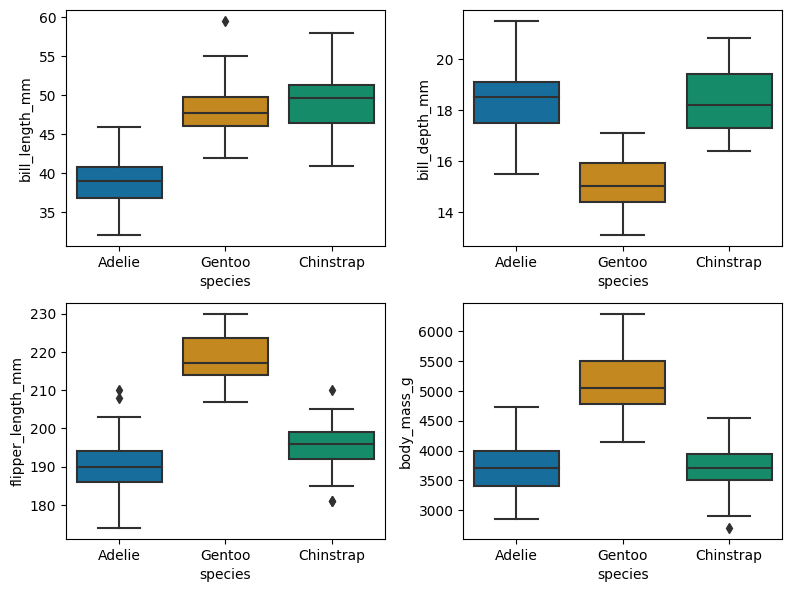

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(8,6))
sns.boxplot(x='species', y= 'bill_length_mm', order=['Adelie', 'Gentoo', 'Chinstrap'], data=train, ax=ax[0,0], palette='colorblind')
sns.boxplot(x='species', y= 'bill_depth_mm', order=['Adelie', 'Gentoo', 'Chinstrap'], data=train, ax=ax[0,1], palette='colorblind')
sns.boxplot(x='species', y= 'flipper_length_mm', order=['Adelie', 'Gentoo', 'Chinstrap'], data=train, ax=ax[1,0], palette='colorblind')
sns.boxplot(x='species', y= 'body_mass_g', order=['Adelie', 'Gentoo', 'Chinstrap'], data=train, ax=ax[1,1], palette='colorblind')
fig.tight_layout(pad=1.0)

Find out how many females and males does the Gentoo penguins species contain.

In [ ]:
Gentoo_Data = df[df['species'] == 'Gentoo'] #Include only the rows where 'species' is equal to 'Gentoo'

<Axes: xlabel='sex', ylabel='count'>

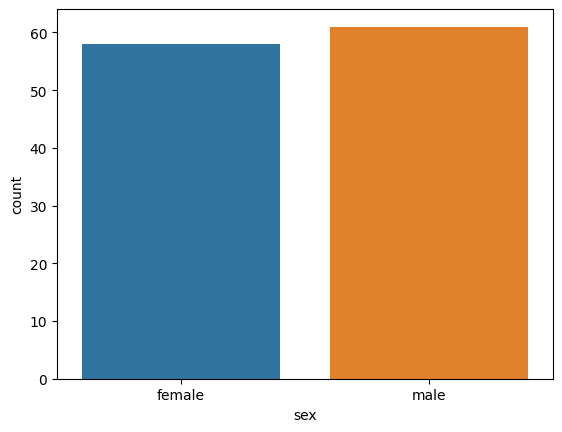

In [ ]:
sns.countplot(x='sex', data= Gentoo_Data) #Create a bar plot for the 'sex' column in the dataframe.
                                          #The 'sex' column in Gentoo_Data should contain information on male and female

In [ ]:
print(Gentoo_Data)

    species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
152  Gentoo  Biscoe            46.1           13.2              211.0   
153  Gentoo  Biscoe            50.0           16.3              230.0   
154  Gentoo  Biscoe            48.7           14.1              210.0   
155  Gentoo  Biscoe            50.0           15.2              218.0   
156  Gentoo  Biscoe            47.6           14.5              215.0   
..      ...     ...             ...            ...                ...   
270  Gentoo  Biscoe            47.2           13.7              214.0   
272  Gentoo  Biscoe            46.8           14.3              215.0   
273  Gentoo  Biscoe            50.4           15.7              222.0   
274  Gentoo  Biscoe            45.2           14.8              212.0   
275  Gentoo  Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  year  
152       4500.0  female  2007  
153       5700.0    male  2007  
154       4450.0  female

In [ ]:
Gentoo_sexes = Gentoo_Data['sex'].value_counts() #Calculate how many times 'male' or 'female' appears in 'sex' column.

In [ ]:
print(Gentoo_sexes.get('female', 0)) #Print how many times 'female' appears in the dataframe.
                                     #If key 'female' is not found, print default value 0.

58


In [ ]:
print(Gentoo_sexes.get('male', 0))

61


There are 58 females and 61 males for the Gentoo penguins.

Compute the correlation matrix between columns, using Pandas corr function.

We can do this with the whole data set, or with the smaller training data set we extracted.

In [ ]:
df.corr() #Calculate correlation coefficients between all pairs of columns in the dataframe.
          #Measures relationship between variables.

<ipython-input-27-ef8dae9a1b86>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() #Calculate correlation coefficients between all pairs of columns in the dataframe.


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.032657
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.048182
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.151068
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.021862
year,0.032657,-0.048182,0.151068,0.021862,1.000000


In [ ]:
train.corr()  #Calculate pairwise correlation of numerical columns in the dataframe 'train'

<ipython-input-28-a11a48ccd2ca>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()  #Calculate pairwise correlation of numerical columns in the dataframe 'train'


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.257493,0.667034,0.624241,-0.019192
bill_depth_mm,-0.257493,1.000000,-0.576425,-0.438545,-0.115321
flipper_length_mm,0.667034,-0.576425,1.000000,0.872302,0.145866
body_mass_g,0.624241,-0.438545,0.872302,1.000000,0.009011
year,-0.019192,-0.115321,0.145866,0.009011,1.000000


Use the Seaborn heatmap function to visualize the correlation matrix.

If there is a negative correlation between two variables, it means that when one variable goes up the other goes down. -1 correlation is a perfect negative correlation. It means the two variables are completely the opposite to each other all the time.

A 1 is the perfect positive correlation. The two variables move in the same direction. Variables flipper_length_mm and body_mass_g have almost a perfect positive correlation of 0.87.



<ipython-input-29-a454981fe5ee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mtx = train.corr()     #Calculate correlation matrix for dataframe 'train' and assign it to corr_mtx


<Axes: >

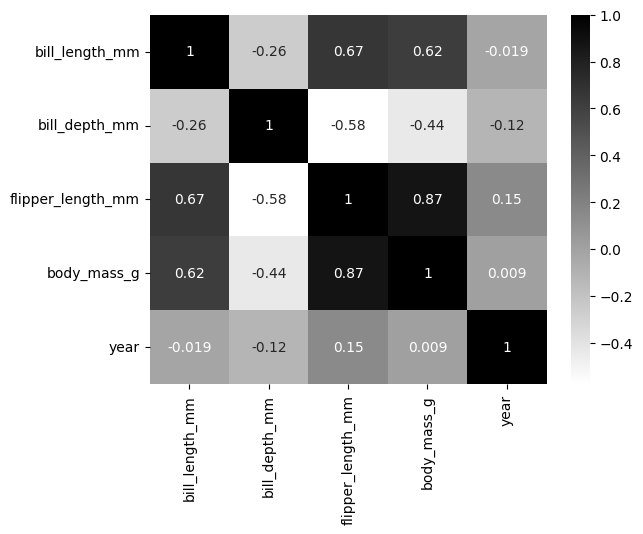

In [ ]:
corr_mtx = train.corr()     #Calculate correlation matrix for dataframe 'train' and assign it to corr_mtx
sns.heatmap(corr_mtx, annot=True, cmap='gist_yarg')

sns.heatmap(corr_mtx, annot=True, cmap='gist_yarg').
Seaborn's heatmap function creates a heatmap of the correlation matrix.
annot=True: adds numeric annotations to each cell in the heatmap. It shows the actual values of the correlation coefficients.
cmap='gist_yarg': sets the color map of the heatmap.

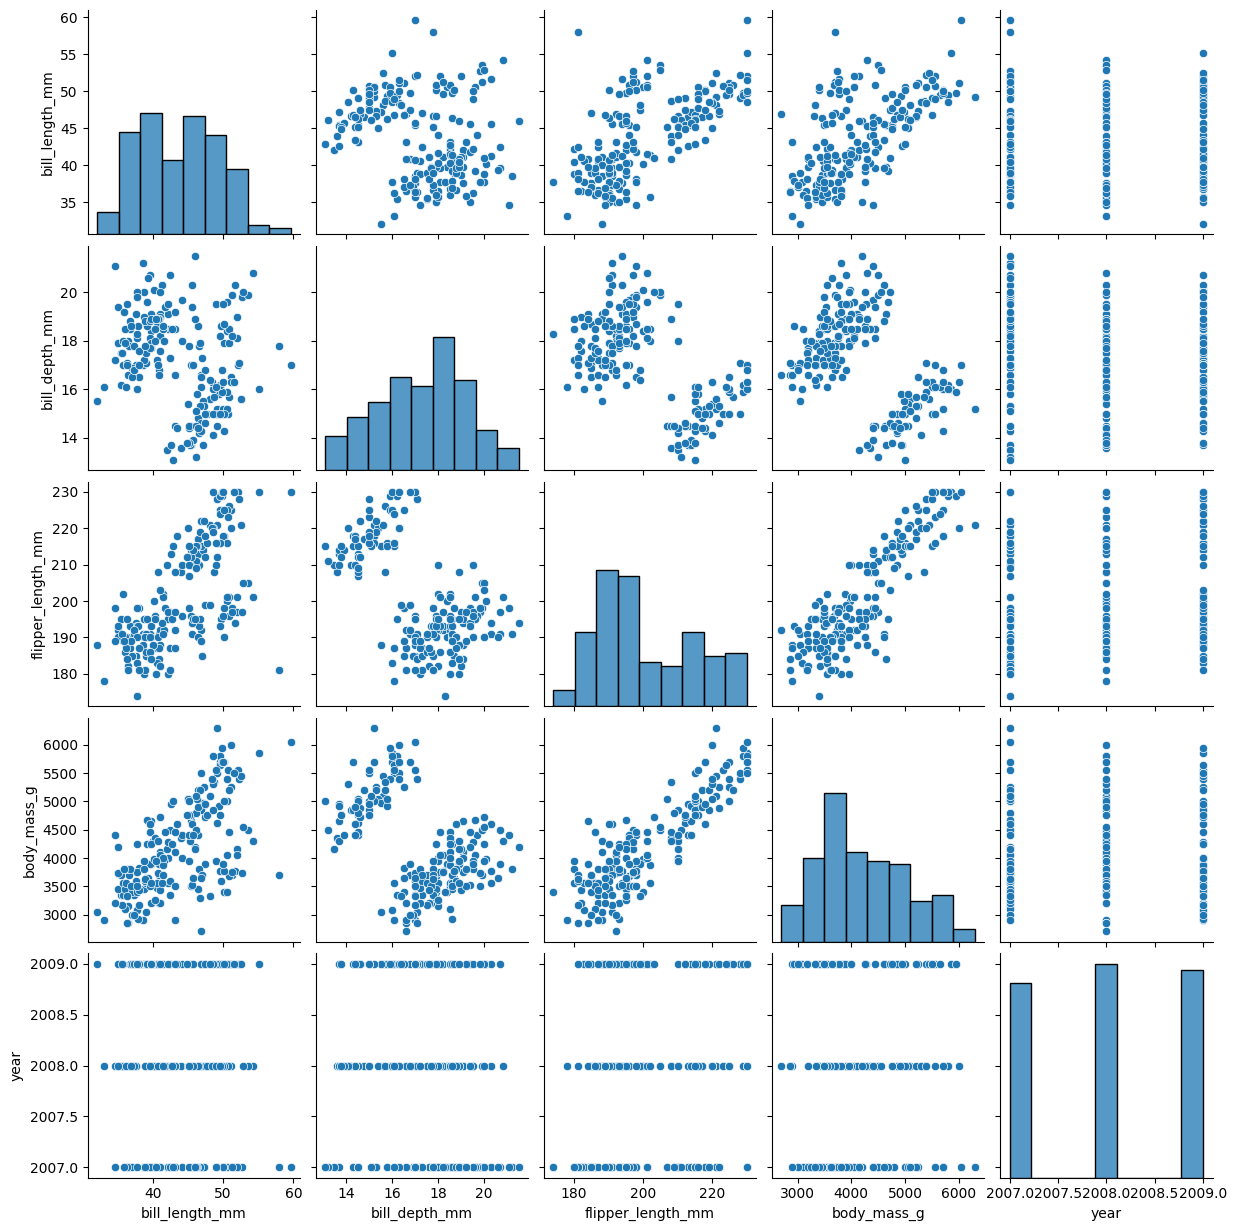

In [ ]:
sns.pairplot(train) #Use Seaborn to create a pair plot for dataframe 'train'

sns.pairplot() generates a grid of scatterplots. For each pair of variables in the dataframe, it creates a scatterplot in the corresponding grid cell. Along the diagonal, it shows histograms for each individual variable.

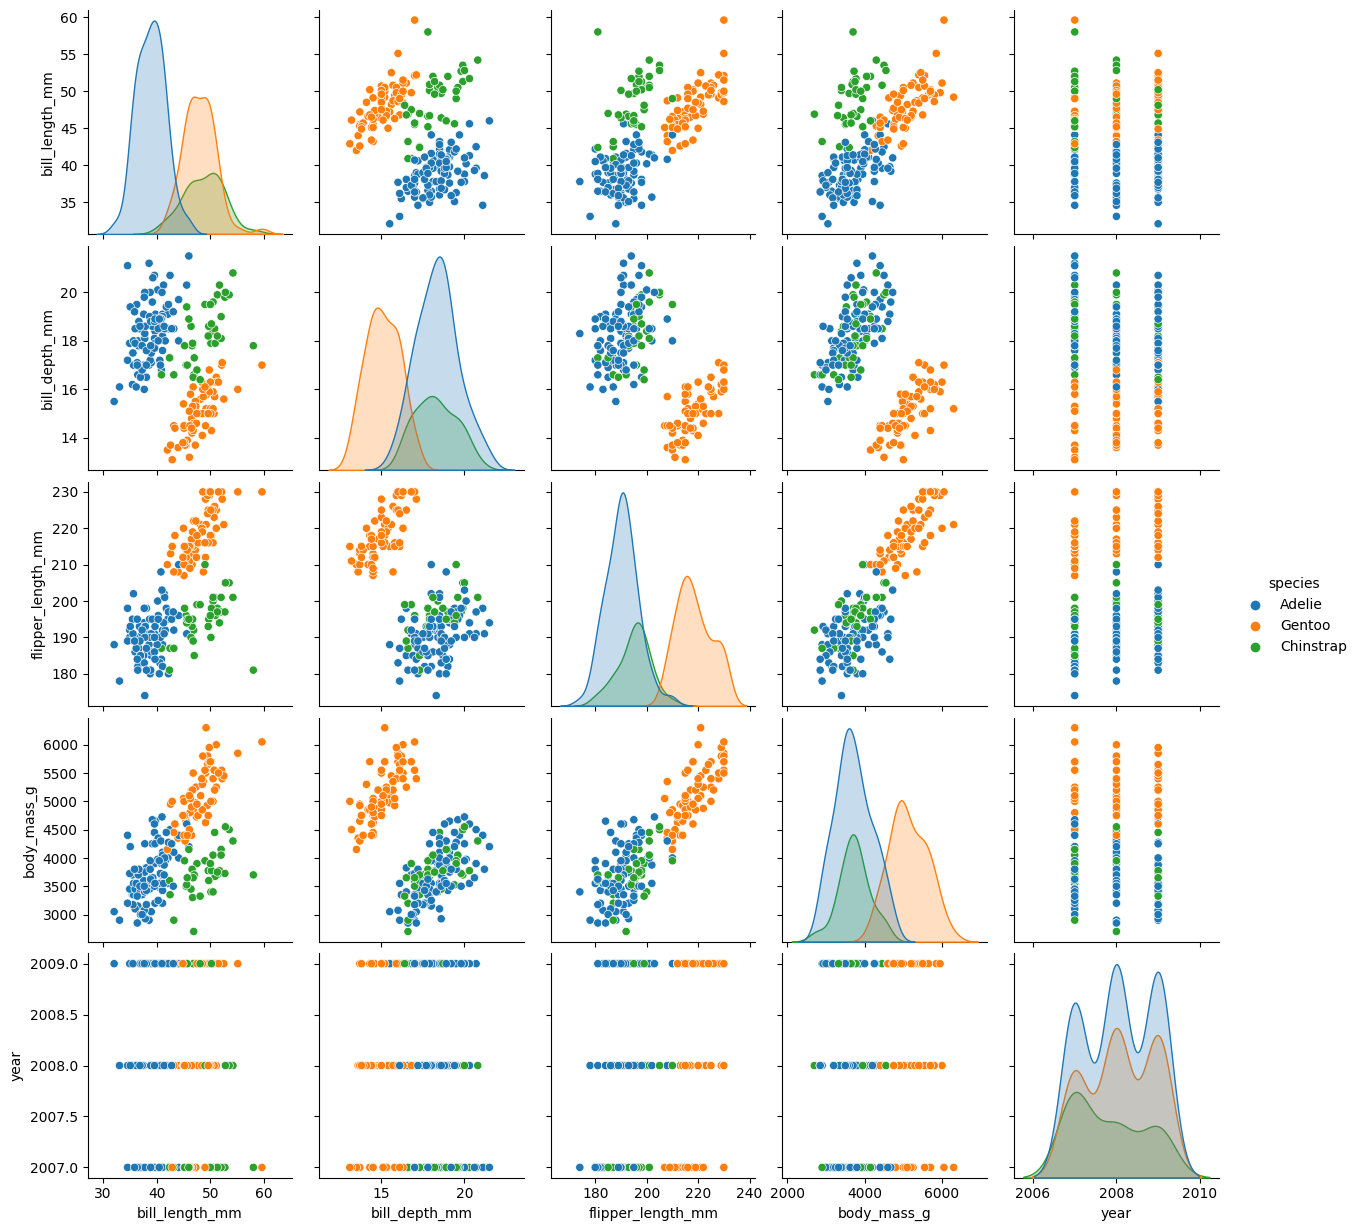

In [ ]:
sns.pairplot(train, hue='species') #[9]

An improved pair plot for the train dataframe. You can distinguish the three species and visualize the data better. From top row second column, you can see that Gentoo penguins have longer bill length than Adelie but the bill depth is shorter.

#A Decision Tree Classifier Machine Learning Model

A classifier is a machine learning model used to discriminate different object based on certain features.

In [ ]:
x_train = train[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']] # train the data features (bill_length, bill_depth, etc)
y_train = train.species                                                               # extract the target variable 'species' for training
x_test = test[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]   # test the data features
y_test = test.species

##Create and Fit the Decision Tree Classifier

In [ ]:
from sklearn import tree
from sklearn import metrics

tree module provides classes and functions for decision-tree based models.
The metrics includes functions that are used to evaluate performance of machine learning models.

Create the decision tree model, then fit the training data to the model.

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=1)  #Use entropy as measure of impurity when deciding on how to split the data. Set a random seed to ensure your code runs multiple times.
clf = clf.fit(x_train, y_train)                                         #Train the decision tree classifier using the training data

#Model Test & Evaluation


Make predictions based on the input data provided.

In [ ]:
y_predict = clf.predict(x_test) #Generate predictions based on the x_test data.

Calculate accuracy of the model

In [ ]:
accuracy = metrics.accuracy_score(y_predict, y_test)
print(accuracy)

0.9402985074626866


metrics.accuracy_score(y_predict, y_test) compares the predicted values (y_predict) with the true values (y_test) and calculates the accuracy of the model's predictions. Correctly predicted instances to the total number of instances.

##Visualize the Decision Tree Classifier

fn list contains the feature names and specifies the names of the features used in the decision tree.

cn list contains the class names and specifies the class names that the decision tree is predicting.

tree.plot_tree() function is used to visualize the decision tree.

filled=True: fills the nodes with colors to represent the majority class

node_ids=True: shows the ID of each node in the tree.

label='all': include additional info such as number of samples and class distribution.

impurity=True: show impurity of each node.

rounded=True: rounds the corners of the nodes in the tree.

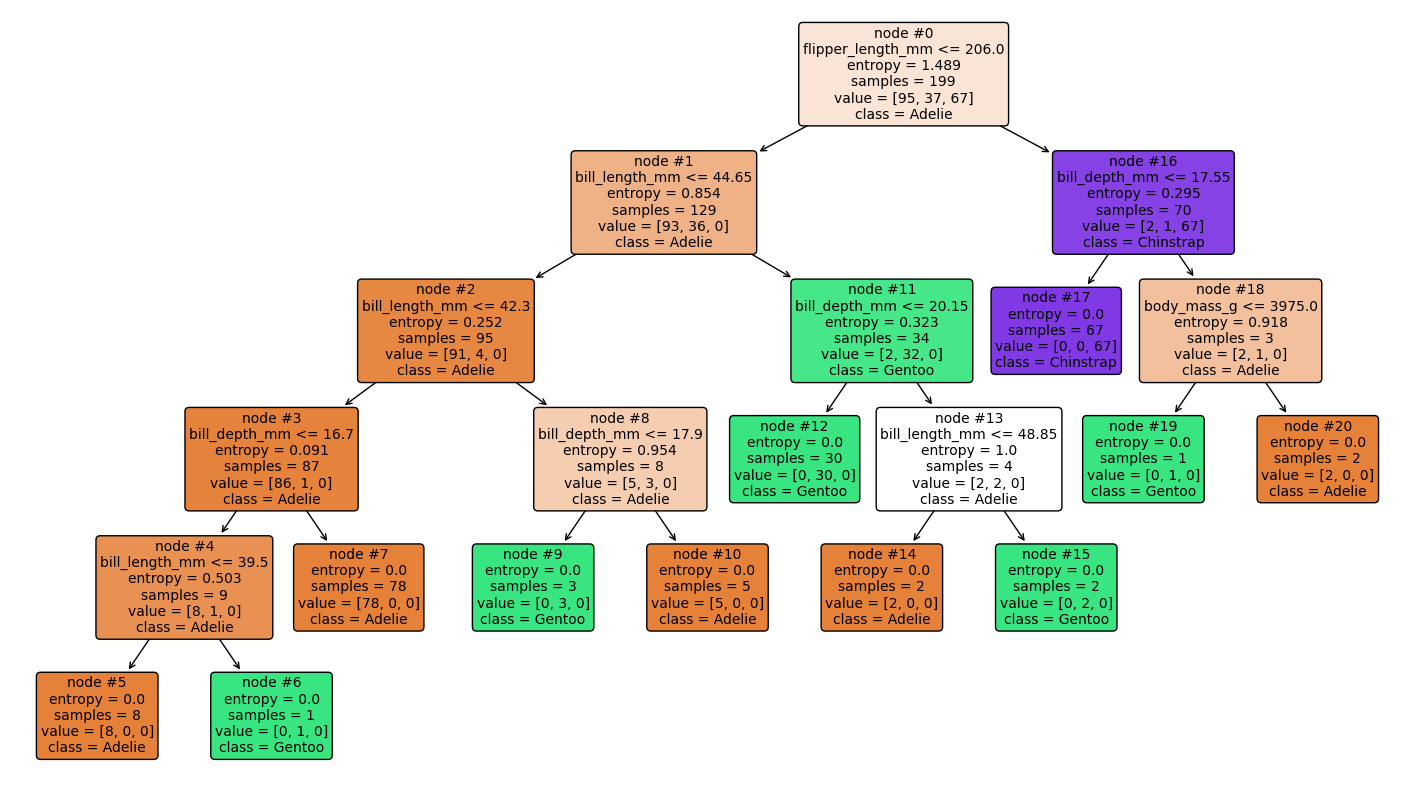

In [ ]:
fig, ax = plt.subplots(1, 1 ,figsize=(18,10))  #Create a subplot ax within fig
fn = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
cn = ['Adelie', 'Gentoo', 'Chinstrap']
artists = tree.plot_tree(clf, feature_names=fn, class_names=cn, filled=True, node_ids=True, label='all', impurity=True, fontsize=10, rounded=True);

The Decision Tree Classifier will break the dataset into smaller subsets. Entropy is used as splitting criteria and it is guiding the decision making process at each node. In the tree above, the algorithm tries to minimize the entropy in each subset. Entropy is the measure of disorder in each sample, so the algorithm will continue to break each subset until entropy is 0 or close to 0.

##Plot Confusion Matrix

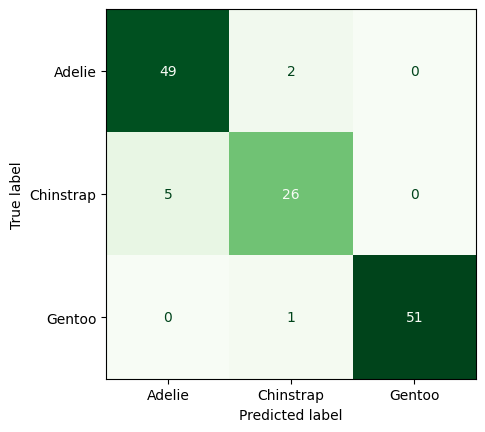

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_predict, cmap='Greens', colorbar=None)

ConfusionMatrixDisplay.from_predictions(y_test, y_predict, cmap='Greens', colorbar=None): create a ConfusionMatrixDisplay using the from_predictions method and display the Confusion matrix.

y_test: contains the true labels of the test set.

cmap='Greens': set the color map to 'greens'.

The true labels axis contains the true results and predicted label axis contains
the values the machine learning algorithm was predicting. An example: on 2nd row 1st column, it says 5 and on predicted label axis it says "Adelie". This means that the machine learning predicted 5 types of "Adelie" but true values were 5 types of Chinstrap. The machine learning generated an error.

Calculate entropy

In [ ]:
from scipy.stats import entropy

In [ ]:
entropy([1/3,1/3, 1/3], base=2)

1.584962500721156

Three possible outcomes. Each outcome has a probability of 1/3.

base=2: specifies that the logarithm used in the entropy calculation is base 2.

#References
[1] A.Horst, "palmerpenguins," 2022. [Online]. Available: "https://github.com/allisonhorst/palmerpenguins/tree/main/inst/extdata. [Accessed on 23 10 2023]

[2] Wikipedia, "Decision Tree," [Online]. Available: "https://en.wikipedia.org/wiki/Decision_tree". [Accessed 15 11 2023].

[3] V.Maini. (2017, Aug 19). Machine Learning for Humans [Online]. Available:
"https://medium.com/machine-learning-for-humans/why-machine-learning-matters-6164faf1df12".

[4] M.Lynch, "Machine Learning with Python", Lecture, ATU, Galway, 2023.

[5] OpenAI © 2015-2023 "https://chat.openai.com/". [Online]. [Accessed 23 11 2023]

[6] kaggle.com, "The new Iris,". [Online]. Available: "https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris". [Accessed 16 11 2023]

[7] John Hunter, Darren Dale, Eric Firing, Michael Droettboom and the Matplotlib development team, "matplotlib" 2002-2012, 2012-2023. [Online].
Available: "https://matplotlib.org/stable/api/". [Accessed on 15 11 2023]

[8] DeepAI "AI image generator", [Online] "https://deepai.org/machine-learning-model/text2img". [Accessed on 22 11 2023]

[9] Michael Waskom "seaborn.pairplot," 2012-2023 [Online]. Available: "https://seaborn.pydata.org/generated/seaborn.pairplot.html". [Accessed on 23 11 2023]
